In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv", names=["n", "ntreads", "seconds"])

df_serial = df[df['ntreads'] == 1]

# Merge to include serial execution time for each row
df = df.merge(df_serial[['n', 'seconds']], on='n', suffixes=('', '_serial'))

df['speedup'] = df['seconds_serial'] / df['seconds']
df['efficiency'] = df['speedup'] / df['ntreads']

colors = ["blue", "orange", "red", "green"]

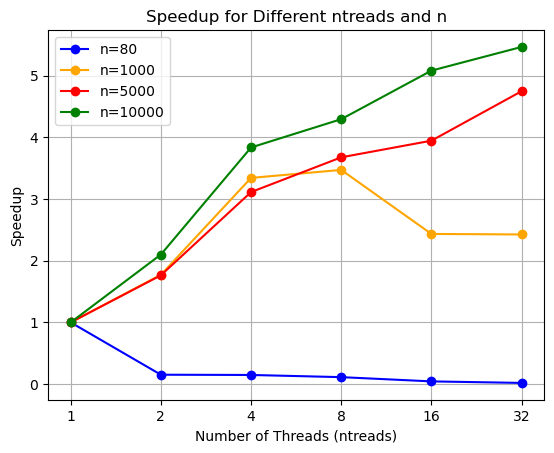

In [16]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.plot(group['ntreads'], group['speedup'], label=f'n={n}', marker='o', color=colors[i])

plt.title('Speedup for Different ntreads and n')
plt.ylabel('Speedup')
plt.xlabel('Number of Threads (ntreads)')
plt.xscale('log', base=2)

plt.xticks([1, 2, 4, 8, 16, 32], [1, 2, 4, 8, 16, 32])

plt.legend()
plt.grid(True)
plt.show()

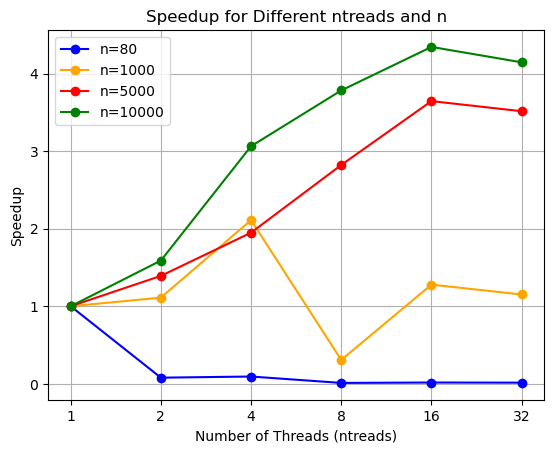

In [13]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.plot(group['ntreads'], group['speedup'], label=f'n={n}', marker='o', color=colors[i])

plt.title('Speedup for Different ntreads and n')
plt.ylabel('Speedup')
plt.xlabel('Number of Threads (ntreads)')
plt.xscale('log', base=2)

plt.xticks([1, 2, 4, 8, 16, 32], [1, 2, 4, 8, 16, 32])

plt.legend()
plt.grid(True)
plt.show()

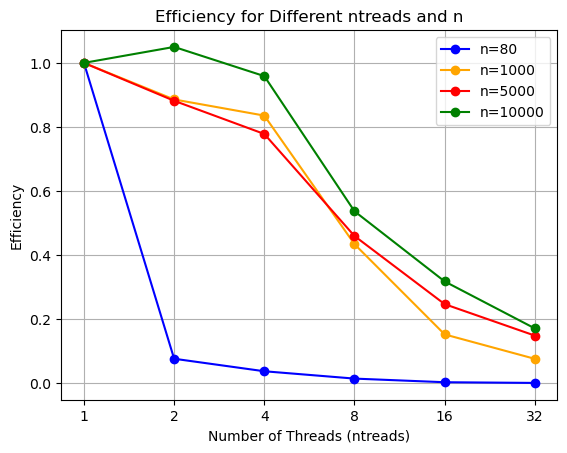

In [17]:
for i, (n, group) in enumerate(df.groupby('n')):
    plt.plot(group['ntreads'], group['efficiency'], label=f'n={n}', marker='o', color=colors[i])

plt.title('Efficiency for Different ntreads and n')
plt.ylabel('Efficiency')
plt.xlabel('Number of Threads (ntreads)')
plt.xscale('log', base=2)

plt.xticks([1, 2, 4, 8, 16, 32], [1, 2, 4, 8, 16, 32])

plt.legend()
plt.grid(True)
plt.show()

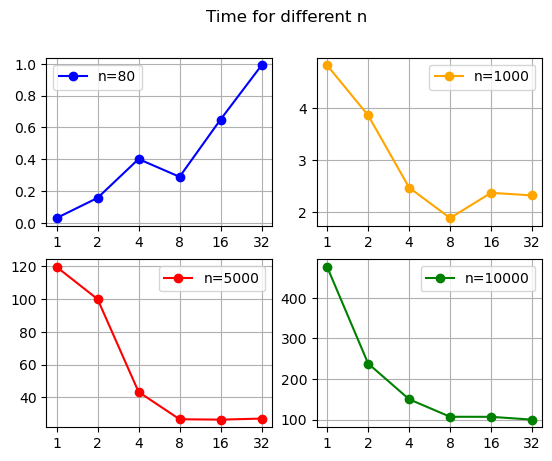

In [8]:
plt.suptitle('Time for different n')

for i, (n, group) in enumerate(df.groupby('n')):
    plt.subplot(2, 2, i+1)
    plt.plot(group['ntreads'], 1e3*group['seconds'], label=f'n={n}', marker='o', color=colors[i])
    plt.xscale('log', base=2)
    plt.xticks([1, 2, 4, 8, 16, 32], [1, 2, 4, 8, 16, 32])
    plt.grid(True)
    plt.legend()
    
plt.show()

In [18]:
df.to_csv("results_after_pandas.csv", index=False)